In [1]:
import pandas as pd
df_shooting5=pd.read_csv('Mass_Shootings_Dataset_Ver5.csv', encoding= 'unicode_escape')
df_shooting5


S#                                Title                Location  \
0      1           Texas church mass shooting  Sutherland Springs, TX   
1      2  Walmart shooting in suburban Denver            Thornton, CO   
2      3      Edgewood businees park shooting            Edgewood, MD   
3      4        Las Vegas Strip mass shooting           Las Vegas, NV   
4      5           San Francisco UPS shooting       San Francisco, CA   
..   ...                                  ...                     ...   
318  319       Clara Barton Elementary School       Chicago, Illinois   
319  320         New Orleans Police Shootings  New Orleans, Louisiana   
320  321                  St. Aloysius Church     Spokane, Washington   
321  322           Rose-Mar College of Beauty           Mesa, Arizona   
322  323        University of Texas at Austin           Austin, Texas   

           Date                                Incident Area  \
0     11/5/2017                                       Church   
1     11/1/2017                                     Wal-Mart   
2    10/18/2017                             Remodeling Store   
3     10/1/2017  Las Vegas Strip Concert outside Mandala Bay   
4     6/14/2017                                 UPS facility   
..          ...                                          ...   
318   1/17/1974               Clara Barton Elementary School   
319  12/31/1972                                          NaN   
320  11/11/1971                                       Church   
321  11/12/1966                   Rose-Mar College of Beauty   
322    8/1/1966                          University of Texas   

    Open/Close Location     Target      Cause  \
0                 Close     random    unknown   
1                  Open     random    unknown   
2                 Close  coworkers    unknown   
3                  Open     random    unknown   
4                 Close  coworkers        NaN   
..                  ...        ...        ...   
318               Close   Teachers      anger   
319                 NaN     random     psycho   
320               Close     random  terrorism   
321               Close     random  terrorism   
322               Close     random  terrorism   

                                               Summary  Fatalities  ...  \
0    Devin Patrick Kelley, 26, an ex-air force offi...          26  ...   
1    Scott Allen Ostrem, 47, walked into a Walmart ...           3  ...   
2    Radee Labeeb Prince, 37, fatally shot three pe...           3  ...   
3    Stephen Craig Paddock, opened fire from the 32...          59  ...   
4    Jimmy Lam, 38, fatally shot three coworkers an...           3  ...   
..                                                 ...         ...  ...   
318  On January 17, 1974, a 14-year-old student ent...           1  ...   
319  On New Year's Eve in 1972, a 23-year-old ex-Na...          10  ...   
320  On November 11, 1971, a former MIT student ent...           2  ...   
321  On November 12, 1966, an 18-year-old high scho...           5  ...   
322  On August 1, 1966, a 25-year-old engineering s...          17  ...   

     Total victims  Policeman Killed  Age Employeed (Y/N)  \
0               46               0.0   26             NaN   
1                3               0.0   47             NaN   
2                6               0.0   37             NaN   
3              585               1.0   64             NaN   
4                5               0.0   38             1.0   
..             ...               ...  ...             ...   
318              4               0.0   14             NaN   
319             22               4.0   23             NaN   
320              5               0.0  NaN             NaN   
321              6               0.0   18             NaN   
322             48               0.0   25             NaN   

               Employed at Mental Health Issues  \
0                      NaN                   No   
1                      NaN         

In [2]:
df_shooting5.columns.values
#df_shooting5=df_shooting5.pop(['S#'], axis = 'columns')
#df_shooting5.pop('S#')
df_shooting5=df_shooting5.drop(['Longitude'], axis = 'columns')
df_shooting5=df_shooting5.drop(['Latitude'], axis = 'columns')

### Matriz de correlacion de datos numericos de la data completa, para una mirada general enfocada en las victimas

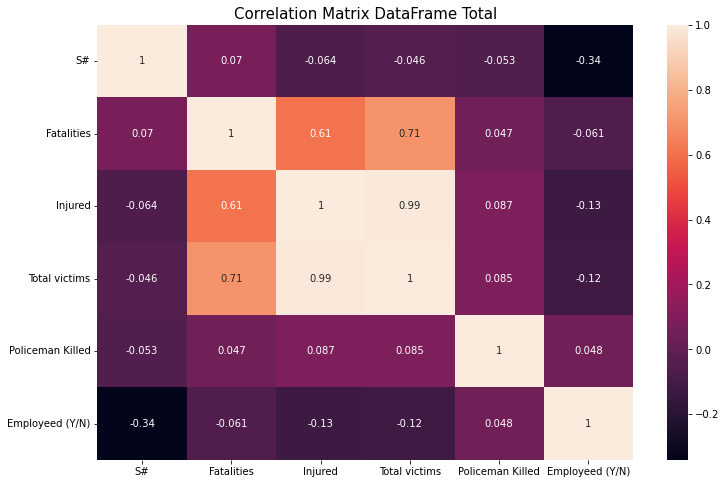

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
corr= df_shooting5.corr()
corr = corr[corr.axes[0]]
fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
ax= sns.heatmap(corr,annot=True,
    xticklabels=corr.columns,
    yticklabels=corr.columns)
plt.title("Correlation Matrix DataFrame Total", fontsize = 15)
plt.show()

In [4]:
df_shooting5.groupby(['Mental Health Issues']).mean()


S#  Fatalities    Injured  Total victims  \
Mental Health Issues                                                     
No                    195.956989    3.903226   3.408602       6.967742   
Unclear                67.076923   12.769231  50.000000      62.692308   
Unknown                94.027273    2.536364   3.281818       5.472727   
Yes                   214.905660    5.811321   6.283019      11.698113   
unknown               107.000000    9.000000   1.000000      10.000000   

                      Policeman Killed  Employeed (Y/N)  
Mental Health Issues                                     
No                            0.064516         0.592593  
Unclear                       1.000000         1.000000  
Unknown                       0.045872         0.833333  
Yes                           0.192308         0.535714  
unknown                       0.000000              NaN

#### Se revisan los valores presentes en la tabla para ver que datos son y como estan catalogados, para posteriormente separa

In [5]:
datos_causa=df_shooting5.groupby(['Cause']).mean()
causas=df_shooting5.groupby(['Cause'])
#causas=causas.drop(['S#'], axis = 'columns')
#causas.plot(kind = 'bar')
datos_causa

S#  Fatalities     Injured  Total victims  \
Cause                                                                     
anger                 170.295455    2.454545    3.886364       6.136364   
breakup               249.000000    0.000000    6.000000       6.000000   
domestic dispute       57.250000    3.083333    1.333333       3.583333   
domestic disputer     214.000000    6.000000    0.000000       6.000000   
drunk                 229.000000    7.000000    2.000000       9.000000   
failing exams         275.333333    3.000000    4.333333       7.000000   
frustration           232.555556    3.666667    3.611111       6.666667   
psycho                180.220588    4.941176    4.044118       8.441176   
racism                118.833333    4.166667    5.000000       9.000000   
religious radicalism  223.000000    6.000000    4.000000       9.000000   
revenge               221.900000    4.100000    2.100000       6.100000   
robbery               290.000000    9.000000    0.000000       9.000000   
suspension            219.000000    1.000000    4.000000       4.000000   
terrorism             177.092308    5.892308    7.861538      13.461538   
unemployement         229.800000    7.100000    3.800000      10.300000   
unknown                 2.500000   22.750000  137.500000     160.000000   

                      Policeman Killed  Employeed (Y/N)  
Cause                                                    
anger                         0.045455         0.700000  
breakup                       0.000000              NaN  
domestic dispute              0.083333         1.000000  
domestic disputer             0.000000         0.000000  
drunk                         0.000000              NaN  
failing exams                 0.000000              NaN  
frustration                   0.000000         0.750000  
psycho                        0.191176         0.533333  
racism                        1.000000         1.000000  
religious radicalism          0.000000              NaN  
revenge                       0.800000         0.000000  
robbery                       0.000000              NaN  
suspension                    0.000000              NaN  
terrorism                     0.016393         0.800000  
unemployement                 0.222222         0.100000  
unknown                       0.250000              NaN

#### Se revisan las causas de los tiroteos de la data completa y sus valores promedio

### Matriz de correlacion seleccionando las causas

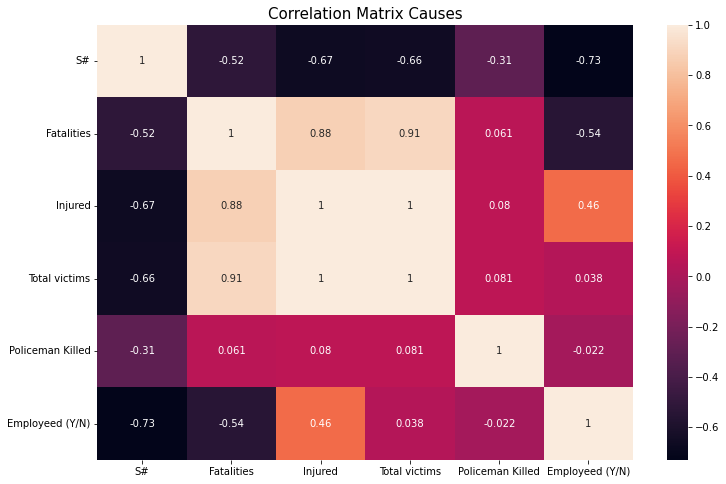

In [6]:
corr= datos_causa.corr()
corr = corr[corr.axes[0]]
fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
ax= sns.heatmap(corr,annot=True,
    xticklabels=corr.columns,
    yticklabels=corr.columns)
plt.title("Correlation Matrix Causes", fontsize = 15)
plt.show()

#### Se agrupan en otro dataframe los datos segun el objetivo para saber cuales son los principales objetivos de los tiradores

In [7]:
#agrupar segun los objetivos
datos_objetivos=df_shooting5.groupby(['Target']).mean()
objetivos=df_shooting5.groupby(['Target'])
#causas=causas.drop(['S#'], axis = 'columns')
#causas.plot(kind = 'bar')
datos_objetivos


S#  Fatalities    Injured  Total victims  \
Target                                                                        
Children                   312.000000    2.500000  10.500000      12.500000   
Congresswoman              197.000000    6.000000  13.000000      19.000000   
Contestant                 133.000000    3.000000   0.000000       3.000000   
Coworker's Family          174.000000    4.000000   2.000000       7.000000   
Coworkers                  240.294118    4.882353   1.882353       6.235294   
Ex-Coworkers               266.777778    5.555556   3.333333       8.444444   
Ex-GirlFriend              228.000000    2.000000   2.000000       4.000000   
Ex-Girlfriend              126.000000    5.000000   1.500000       6.000000   
Ex-Girlfriend & Family     141.000000    0.000000   6.000000       6.000000   
Ex-Girlfriend+random       148.000000    5.000000   0.000000       4.000000   
Ex-Wife                    177.428571    5.285714   2.428571       7.142857   
Ex-Wife & Family           178.666667    5.333333   2.000000       6.666667   
Ex-girlfriend              111.000000    3.000000   1.000000       3.000000   
Family                      99.594595    4.135135   0.810811       4.243243   
Family+random              160.000000    4.000000   2.000000       6.000000   
Family+students            177.000000   28.000000   2.000000      29.000000   
Family/Neighbors            68.000000    4.000000   0.000000       3.000000   
Friends                    140.500000    3.000000   1.500000       4.000000   
Girlfriend                 171.000000    5.000000   0.000000       4.000000   
House Owner                129.000000    2.000000   3.000000       5.000000   
Marines                    104.000000    5.000000   3.000000       7.000000   
Policeman                  150.571429    3.571429   4.857143       7.571429   
Policeman+Council Member   213.000000    6.000000   2.000000       7.000000   
Sikhs                      182.000000    7.000000   4.000000      10.000000   
Social Workers             283.000000    5.000000   0.000000       4.000000   
Students                   220.062500    1.875000   6.375000       8.250000   
Students+Parents           252.000000    4.000000  25.000000      29.000000   
Students+Teachers          269.071429    3.428571   7.500000      10.642857   
TSA Officer                162.000000    1.000000   3.000000       4.000000   
Teachers                   285.200000    2.000000   2.000000       3.800000   
Trooper                     27.000000    2.000000   2.000000       3.000000   
basketball players         226.000000    0.000000   5.000000       5.000000   
birthday party bus          25.000000    0.000000   5.000000       5.000000   
black men                  187.000000    3.000000   2.000000       5.000000   
club members                48.000000    0.000000   5.000000       5.000000   
coworkers                    5.800000    3.400000   1.000000       4.400000   
drug dealer                 79.000000    3.000000   1.000000       4.000000   
hunters                    235.000000    6.000000   2.000000       8.000000   
lawyers                    279.000000    9.000000   6.000000      14.000000   
monks                      290.000000    9.000000   0.000000       9.000000   
neighbors                   76.500000    4.000000   0.250000       4.000000   
partner's family           170.000000    7.000000   1.000000       7.000000   
party guests               104.375000    3.125000   6.375000       9.250000   
police                      12.500000    4.000000   7.000000      11.000000   
postmaster                 310.000000    1.000000   3.000000       4.000000   
prayer group               258.000000    3.000000   5.000000       8.000000   
protestors                  85.000000    0.000000   5.000000       5.000000   
psychologist+psychiatrist  271.000000    5.000000  23.000000      27.000000   
random                     149.578571    5.064286   9.742857      14.542857   
rapper

#### Se procede a agrupar segun el dato de tiradores que presentan/presentaron problemas de salud mental, se revisa cuales son sus objetivos y los valores promedio de sus victimas

In [8]:
grupo_mental_media=df_shooting5.groupby(['Mental Health Issues']).mean()
grupo_mental=df_shooting5.groupby(['Mental Health Issues'])
#grupo_mental_media

In [9]:
#los que tienen problemas de salud mental
df_shooting5_mentalYes=df_shooting5[df_shooting5['Mental Health Issues']=='Yes']
df_shooting5_mentalYes
df_shooting5_mentalYes.groupby(['Target']).mean()

S#  Fatalities    Injured  Total victims  \
Target                                                                        
Children                   312.000000    2.500000  10.500000      12.500000   
Congresswoman              197.000000    6.000000  13.000000      19.000000   
Coworker's Family          174.000000    4.000000   2.000000       7.000000   
Coworkers                  268.166667    6.333333   1.500000       7.333333   
Ex-Coworkers               269.142857    5.857143   3.571429       9.000000   
Ex-GirlFriend              228.000000    2.000000   2.000000       4.000000   
Ex-Wife                    200.666667    8.000000   2.000000      10.000000   
Ex-Wife & Family           178.666667    5.333333   2.000000       6.666667   
Family                     108.375000    4.000000   0.500000       4.000000   
Family+students            177.000000   28.000000   2.000000      29.000000   
Marines                    104.000000    5.000000   3.000000       7.000000   
Policeman                  186.333333    4.333333   5.666667       9.333333   
Students                   213.250000    2.750000   8.250000      10.750000   
Students+Parents           252.000000    4.000000  25.000000      29.000000   
Students+Teachers          275.300000    3.700000   8.600000      11.900000   
Teachers                   308.333333    1.000000   3.333333       4.333333   
coworkers                    6.500000    3.000000   1.000000       4.000000   
police                      12.000000    3.000000   3.000000       6.000000   
postmaster                 310.000000    1.000000   3.000000       4.000000   
prayer group               258.000000    3.000000   5.000000       8.000000   
psychologist+psychiatrist  271.000000    5.000000  23.000000      27.000000   
random                     215.093023    7.325581   8.441860      15.325581   
welding shop employees     312.000000    9.000000   3.000000      11.000000   
women                       11.000000    5.000000   0.000000       5.000000   

                           Policeman Killed  Employeed (Y/N)  
Target                                                        
Children                           0.000000              NaN  
Congresswoman                      0.000000              NaN  
Coworker's Family                  1.000000              NaN  
Coworkers                          0.000000         1.000000  
Ex-Coworkers                       0.000000         0.000000  
Ex-GirlFriend                      0.000000              NaN  
Ex-Wife                            0.000000              NaN  
Ex-Wife & Family                   0.000000              NaN  
Family                             0.000000         1.000000  
Family+students                    0.000000              NaN  
Marines                            0.000000              NaN  
Policeman                          3.666667         1.000000  
Students                           0.000000              NaN  
Students+Parents                   0.000000              NaN  
Students+Teachers                  0.000000         0.000000  
Teachers                           0.000000              NaN  
coworkers                          0.500000         1.000000  
police                             3.000000              NaN  
postmaster                         0.000000         0.000000  
prayer group                       0.000000              NaN  
psychologist+psychiatrist          0.000000         0.000000  
random                             0.095238         0.555556  
welding shop employees             0.000000              NaN  
women                                   NaN              NaN

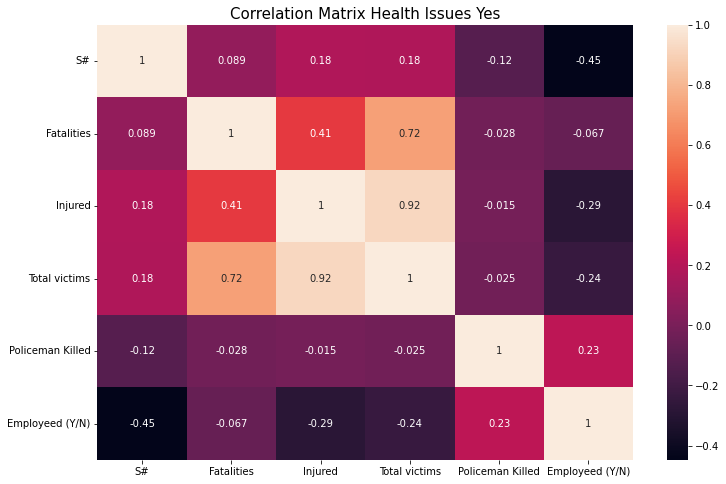

In [10]:
corr= df_shooting5_mentalYes.corr()
corr = corr[corr.axes[0]]
fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
ax= sns.heatmap(corr,annot=True,
    xticklabels=corr.columns,
    yticklabels=corr.columns)
plt.title("Correlation Matrix Health Issues Yes", fontsize = 15)
plt.show()

#### Se crea un nuevo dataframe para revisar la relacion para tiradores en general y con problemas de salud mental y los objetivos, inicialmente con objetivo relacionado al trabajo, luego con los estudios

In [11]:
#Coworkers en total (de toda la data)
df_shooting5_CoworksA=df_shooting5[df_shooting5['Target']=='coworkers']
df_shooting5_CoworksB=df_shooting5[df_shooting5['Target']=="Coworker's Family"]
df_shooting5_CoworksC=df_shooting5[df_shooting5['Target']=='Coworkers']
df_shooting5_CoworksD=df_shooting5[df_shooting5['Target']=='Ex-Coworkers']

coworkers = pd.concat([df_shooting5_CoworksA, df_shooting5_CoworksB,df_shooting5_CoworksC,df_shooting5_CoworksD])
coworkers

S#                                     Title                  Location  \
2      3           Edgewood businees park shooting              Edgewood, MD   
4      5                San Francisco UPS shooting         San Francisco, CA   
5      6         Pennsylvania supermarket shooting           Tunkhannock, PA   
6      7      Florida awning manufacturer shooting          Orlando, Florida   
7      8          Rural Ohio nursing home shooting        Kirkersville, Ohio   
173  174             Los Angeles Police Department        Irvine, California   
98    99  Virginia WDBJ live TV interview shooting         Roanoke, Virginia   
155  156                            Kennesaw FedEx         Kennesaw, Georgia   
198  199       University of Alabama in Huntsville       Huntsville, Alabama   
210  211                         Atlantis Plastics       Henderson, Kentucky   
229  230                        Goleta Post Office        Goleta, California   
235  236          Windy City Core Supply Warehouse         Chicago, Illinois   
241  242                    Navistar International    Melrose Park, Illinois   
242  243                        Wakefield massacre  Wakefield, Massachusetts   
243  244                   Radisson Bay Harbor Inn            Tampa, Florida   
254  255    Connecticut State Lottery Headquarters    Newington, Connecticut   
255  256                     Milwaukee Post Office      Milwaukee, Wisconsin   
265  266                    Walter Rossler Company     Corpus Christi, Texas   
272  273                       Chelsea High School         Chelsea, Michigan   
279  280                      Dearborn Post Office        Dearborn, Michigan   
286  287                        University of Iowa           Iowa City, Iowa   
302  303           Post office in Edmond, Oklahoma          Edmond, Oklahoma   
304  305                       Atlanta Post Office          Atlanta, Georgia   
180  181     Accent Signage Systems in Minneapolis    Minneapolis, Minnesota   
256  257                 Caltrans Maintenance Yard        Orange, California   
259  260                       R.E. Phelon Company     Aiken, South Carolina   
262  263          Fort Lauderdale revenge shooting  Fort Lauderdale, Florida   
273  274                 Chuck E. Cheese in Aurora          Aurora, Colorado   
285  286                     Royal Oak Post Office       Royal Oak, Michigan   
288  289                     Ridgewood Post Office     Ridgewood, New Jersey   
291  292              Standard Gravure Corporation      Louisville, Kentucky   
298  299  Electromagnetic Systems Laboratory (ESL)     Sunnyvale, California   

           Date                      Incident Area Open/Close Location  \
2    10/18/2017                   Remodeling Store               Close   
4     6/14/2017                       UPS facility               Close   
5      6/7/2017                       Weis grocery               Close   
6      6/5/2017           manufacturer Fiamma Inc.               Close   
7     5/12/2017                     a nursing home               Close   
173    2/3/2013                                NaN          Open+Close   
98    8/26/2015              Outdoor Shopping Mall                Open   
155   4/29/2014                          Workplace               Close   
198   2/12/2010              University of Alabama               Close   
210   6/25/2008          Atlantis Plastics Factory               Close   
229   1/30/2006                 Goleta Post Office               Close   
235   8/27/2003                          Warehouse               Close   
241    2/5/2001           Navistar in Melrose Park               Close   
242  12/26/2000               Edgewater Technology               Close   
243  12/30/1999                                NaN          Open+Close   
254    3/6/1998                          Workplace               Close   
255  12/19/1997                          Workplace               Close   
265    4/3/1995                  

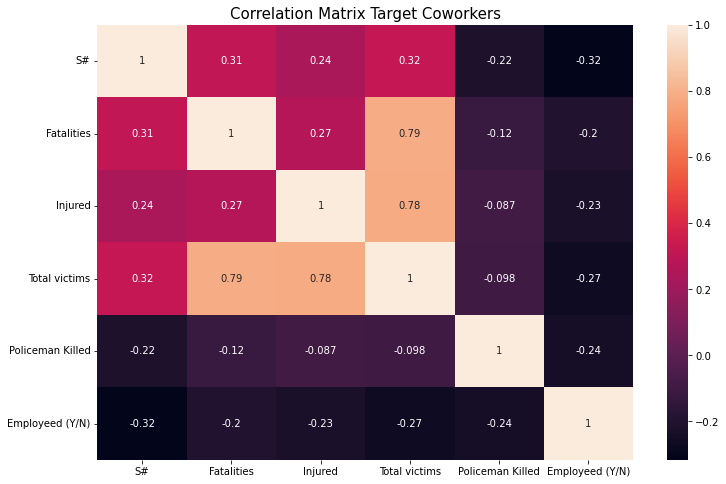

In [12]:
corr= coworkers.corr()
corr = corr[corr.axes[0]]
fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
ax= sns.heatmap(corr,annot=True,
    xticklabels=corr.columns,
    yticklabels=corr.columns)
plt.title("Correlation Matrix Target Coworkers", fontsize = 15)
plt.show()

#### Para los tiradores que si tienen problemas de salud mental y el objetivo relacionado con el trabajo

In [13]:
#solo de los que tienen problema de salud mental
df_shooting5_CoworksA_YES=df_shooting5_mentalYes[df_shooting5_mentalYes['Target']=='coworkers']
df_shooting5_CoworksB_YES=df_shooting5_mentalYes[df_shooting5_mentalYes['Target']=="Coworker's Family"]
df_shooting5_CoworksC_YES=df_shooting5_mentalYes[df_shooting5_mentalYes['Target']=='Coworkers']
df_shooting5_CoworksD_YES=df_shooting5_mentalYes[df_shooting5_mentalYes['Target']=='Ex-Coworkers']

coworkers_YES = pd.concat([df_shooting5_CoworksA_YES, df_shooting5_CoworksB_YES,df_shooting5_CoworksC_YES,df_shooting5_CoworksD_YES])
coworkers_YES

S#                                     Title                  Location  \
4      5                San Francisco UPS shooting         San Francisco, CA   
7      8          Rural Ohio nursing home shooting        Kirkersville, Ohio   
173  174             Los Angeles Police Department        Irvine, California   
229  230                        Goleta Post Office        Goleta, California   
242  243                        Wakefield massacre  Wakefield, Massachusetts   
254  255    Connecticut State Lottery Headquarters    Newington, Connecticut   
272  273                       Chelsea High School         Chelsea, Michigan   
302  303           Post office in Edmond, Oklahoma          Edmond, Oklahoma   
304  305                       Atlanta Post Office          Atlanta, Georgia   
180  181     Accent Signage Systems in Minneapolis    Minneapolis, Minnesota   
262  263          Fort Lauderdale revenge shooting  Fort Lauderdale, Florida   
273  274                 Chuck E. Cheese in Aurora          Aurora, Colorado   
285  286                     Royal Oak Post Office       Royal Oak, Michigan   
288  289                     Ridgewood Post Office     Ridgewood, New Jersey   
291  292              Standard Gravure Corporation      Louisville, Kentucky   
298  299  Electromagnetic Systems Laboratory (ESL)     Sunnyvale, California   

           Date                      Incident Area Open/Close Location  \
4     6/14/2017                       UPS facility               Close   
7     5/12/2017                     a nursing home               Close   
173    2/3/2013                                NaN          Open+Close   
229   1/30/2006                 Goleta Post Office               Close   
242  12/26/2000               Edgewater Technology               Close   
254    3/6/1998                          Workplace               Close   
272  12/16/1993                Chelsea High School               Close   
302   8/20/1986                   Edmond, Oklahoma               Close   
304    3/6/1985                Atlanta Post Office               Close   
180   9/27/2012    Accent Signage Systems Building               Close   
262    2/9/1996                                NaN                 NaN   
273  12/14/1993                    Chuck E. Cheese               Close   
285  11/14/1991           Post Office in Royal Oak               Close   
288  10/10/1991                                NaN               Close   
291   9/14/1989  Standard Gravure printing company               Close   
298   2/16/1988                   ESL in Sunnyvale          Open+Close   

                Target          Cause  \
4            coworkers            NaN   
7            coworkers            NaN   
173  Coworker's Family          anger   
229          Coworkers         psycho   
242          Coworkers            NaN   
254          Coworkers          anger   
272          Coworkers          anger   
302          Coworkers            NaN   
304          Coworkers          anger   
180       Ex-Coworkers  unemployement   
262       Ex-Coworkers        revenge   
273       Ex-Coworkers  unemployement   
285       Ex-Coworkers  unemployement   
288       Ex-Coworkers        revenge   
291       Ex-Coworkers    frustration   
298       Ex-Coworkers        revenge   

                                               Summary  Fatalities  Injured  \
4    Jimmy Lam, 38, fatally shot three coworkers an...           3        2   
7    Thomas Hartless, 43, shot and killed a former ...           3        0   
173  On February 3, 2013, a 33-year old former LAPD...           4        2   
229  On January 30, 2006, a 44-year-old postal work...           8        0   
242  Michael McDermott, 42, opened fire on co-worke...           7        0   
254  On March 6, 1998, a 35-year-old disgruntled em...           5        0   
272  On December 16, 1993, after a meeting with sch...           1        2   
302  On August 20, 1986, a 44-year-old postal worke...  

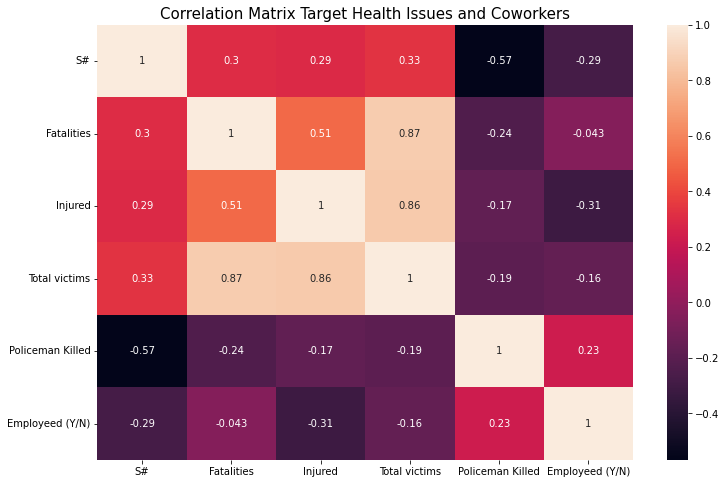

In [14]:
corr= coworkers_YES.corr()
corr = corr[corr.axes[0]]
fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
ax= sns.heatmap(corr,annot=True,
    xticklabels=corr.columns,
    yticklabels=corr.columns)
plt.title("Correlation Matrix Target Health Issues and Coworkers", fontsize = 15)
plt.show()

In [15]:
#para obtener los que tienen y no tienen problemas de salud mental
df_shooting5_menta_data=df_shooting5[df_shooting5['Mental Health Issues']=='Yes']
df_shooting5_menta_data=df_shooting5[df_shooting5['Mental Health Issues']=='No']
df_shooting5_menta_data
##df_shooting5_menta_data.groupby(['Target']).mean()

S#                                   Title                Location  \
0      1              Texas church mass shooting  Sutherland Springs, TX   
1      2     Walmart shooting in suburban Denver            Thornton, CO   
2      3         Edgewood businees park shooting            Edgewood, MD   
60    61     Kalamazoo Uber Driver Spree Killing                     NaN   
116  117                               Milwaukee    Milwaukee, Wisconsin   
..   ...                                     ...                     ...   
290  291                        GMAC Loan Office   Jacksonville, Florida   
292  293                Orange Glenn Post Office   Escondido, California   
296  297  Comet Auto Parts and Montefiore School       Chicago, Illinois   
299  300               Pinellas Park High School  Pinellas Park, Florida   
317  318                       Olean High School         Olean, New York   

           Date     Incident Area Open/Close Location     Target  \
0     11/5/2017            Church               Close     random   
1     11/1/2017          Wal-Mart                Open     random   
2    10/18/2017  Remodeling Store               Close  coworkers   
60    2/20/2016               NaN                Open     random   
116    5/1/2015            street                Open     random   
..          ...               ...                 ...        ...   
290   6/17/1990               NaN                 NaN     random   
292   8/10/1989               NaN               Close     random   
296   9/22/1988               NaN          Open+Close     random   
299   2/11/1988            School               Close        NaN   
317  12/30/1974               NaN          Open+Close     random   

                Cause                                            Summary  \
0             unknown  Devin Patrick Kelley, 26, an ex-air force offi...   
1             unknown  Scott Allen Ostrem, 47, walked into a Walmart ...   
2             unknown  Radee Labeeb Prince, 37, fatally shot three pe...   
60                NaN  An Uber driver fired upon people in three loca...   
116  domestic dispute  dylann Storm Roof, 21, shot and killed 9 peopl...   
..                ...                                                ...   
290            psycho  After fatally shooting a man and woman and wou...   
292            psycho  On August 10, 1989, a 52-year-old "model" post...   
296         terrorism  On September 22, 1988, a 40-year-old Vietnam v...   
299       frustration  On February 11, 1988, two students age 15 and ...   
317         terrorism  On December 30, 1974, a 17-year-old honor stud...   

     Fatalities  Injured  Total victims  Policeman Killed    Age  \
0            26       20             46               0.0     26   
1             3        0              3               0.0     47   
2             3        3              6               0.0     37   
60            6        2              8               0.0    NaN   
116           2        3              5               0.0    NaN   
..          ...      ...            ...               ...    ...   
290          12        6             17               0.0     42   
292           4        1              4               0.0     52   
296           5        2              6               1.0     40   
299           1        2              3               0.0  15,16   
317           3        7             10               0.0     17   

     Employeed (Y/N)               Employed at Mental Health Issues  \
0                NaN                       NaN                   No   
1                NaN                       NaN                   No   
2                NaN     Advance Granite Store                   No   
60               1.0                      uber                   No   
116              NaN                       NaN                   No   
..               ...                       ...                  ...   
290              NaN                       NaN   

In [16]:
#binarios_data_mental=pd.get_dummies(df_shooting5_menta_data)
#binarios_data_mental

In [17]:
'''corr= binarios_data_mental.corr()
corr = corr[corr.axes[0]]
fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
ax= sns.heatmap(corr,annot=True,
    xticklabels=corr.columns,
    yticklabels=corr.columns)
plt.title("Correlation Matrix General Mental", fontsize = 15)
plt.show()
'''

'corr= binarios_data_mental.corr()\ncorr = corr[corr.axes[0]]\nfig= plt.figure(figsize=(12,8))\nax= fig.add_subplot(111)\nax= sns.heatmap(corr,annot=True,\n    xticklabels=corr.columns,\n    yticklabels=corr.columns)\nplt.title("Correlation Matrix General Mental", fontsize = 15)\nplt.show()\n'

#### Students like target


#### nuevo dataframe con objetivo escolar y estudiantes

In [18]:
df_shooting5_ninos=df_shooting5[df_shooting5['Target']=='Children']
df_shooting5_students=df_shooting5[df_shooting5['Target']=="Students"]
df_shooting5_studparents=df_shooting5[df_shooting5['Target']=='Students+Parents']
df_shooting5_studteachers=df_shooting5[df_shooting5['Target']=='Students+Teachers']
df_shooting5_teachers=df_shooting5[df_shooting5['Target']=='Teachers']

schools = pd.concat([df_shooting5_ninos, df_shooting5_students,df_shooting5_studparents,df_shooting5_studteachers,df_shooting5_teachers])


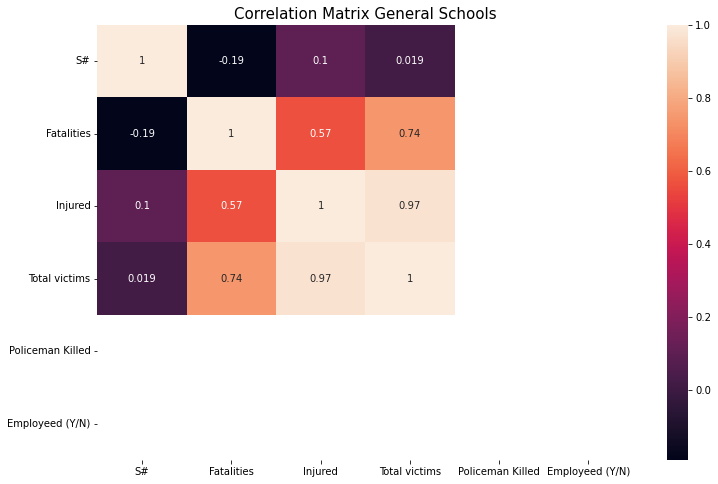

In [19]:
corr= schools.corr()
corr = corr[corr.axes[0]]
fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
ax= sns.heatmap(corr,annot=True,
    xticklabels=corr.columns,
    yticklabels=corr.columns)
plt.title("Correlation Matrix General Schools", fontsize = 15)
plt.show()